# **Time-Series Analysis for Correlations Between Service Volumes and Supplier Charges**

## **Introduction**

This notebook examines the temporal relationships between **service volumes (`Tot_Suplr_Srvcs`)** and **supplier charges (`Avg_Suplr_Sbmtd_Chrg`)** to identify patterns suggesting inefficiencies or irregularities. Leveraging both the **cleaned dataset** (anomalies removed) and the **full dataset** (including anomalies), the analysis uncovers systemic inefficiencies, cost irregularities, and periods of concern in supplier behavior.



## **Research Question**

**RQ3**: How do correlations between service volumes and supplier charges evolve over time, and what temporal patterns suggest inefficiencies?


## **Objectives**

1.  **Rolling Correlation Analysis**:
   - Use rolling Spearman correlations to track how the relationship between service volumes and charges evolves over time.
   
2.  **Evaluate Temporal Trends**:
   - Analyze trends in service volumes and submitted charges over time for both cleaned and full datasets.
   - Identify periods of stability, growth, or decline in correlations.

3. **Detect Patterns of Inefficiency**:
   - Highlight temporal mismatches where submitted charges rise disproportionately relative to service volumes.
   - Identify systemic inefficiencies and unusual regional behaviors.

4. **Compare Full and Cleaned Datasets**:
   - Assess differences in correlations between cleaned (anomaly-free) and full datasets to quantify the impact of anomalies.


5. **Regional and Temporal Analysis**:
   - Investigate how inefficiencies and correlations vary across regions and evolve over time, focusing on unusual patterns and fluctuations.



## **Methodology**

1. **Data Preparation**:
   - Use the **cleaned training dataset** (anomalies removed) for baseline trend and correlation analysis.
   - Combine training and test datasets (including anomalies) to analyze real-world patterns and detect inefficiencies.
 
 
2. **Exploratory Analysis**:
   - **Rolling Correlation Analysis**:
     - Calculate rolling Spearman correlations between `Tot_Suplr_Srvcs` and `Avg_Suplr_Sbmtd_Chrg` to capture temporal trends in their relationship.
     - Compare rolling correlations for cleaned and full datasets to highlight the effects of anomalies.
   - **Trend Analysis**:
     - Visualize temporal trends in service volumes and submitted charges for both cleaned and full datasets.
   - **Charge Behavior Analysis**:
     - Compare trends of submitted charges (`Avg_Suplr_Sbmtd_Chrg`) with Medicare allowed amounts (`Avg_Suplr_Mdcr_Alowd_Amt`) and payments (`Avg_Suplr_Mdcr_Pymt_Amt`).
   - **Regional Analysis for Temporal Inefficiencies**:
     - Group data by region and year to examine regional differences in service volumes and submitted charges.
     - Identify regions with consistently unusual patterns or significant fluctuations in correlations.
   - **Comparison Between Full and Cleaned Datasets**:
     - Calculate Spearman correlations for both datasets and assess year-by-year differences to highlight the impact of anomalies.
   - **Temporal Spearman Correlation Trends for Unusual Regions**:
     - Track year-by-year correlation trends for regions identified as having unusual behaviors.
 
 
3. **Visualization**:
   - Generate plots to illustrate rolling correlations, trends, regional inefficiencies, and temporal correlation differences between datasets.



In [1]:
import os

# Set the working directory to the folder
os.chdir('/Users/rozani/Desktop/capstone')

In [4]:
# Suppress warnings during execution
import warnings
warnings.filterwarnings("ignore")

# Importing essential libraries for data handling, modeling, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr


In [5]:
# Load cleaned training data
cleaned_train_data = pd.read_csv('cleaned_data.csv')
print("Cleaned Training Data Shape:", cleaned_train_data.shape)

# Load full training data (possibly includes anomalies)
train_data = pd.read_csv('combined_data.csv')
print("Training Data Shape:", train_data.shape)

# Load test data
test_data = pd.read_csv('Test_data.csv')
print("Test Data Shape:", test_data.shape)

# Combine full training and test data for complete analysis
full_data = pd.concat([train_data, test_data]).reset_index(drop=True)
print("Full Data Shape:", full_data.shape)

Cleaned Training Data Shape: (280299, 23)
Training Data Shape: (295052, 23)
Test Data Shape: (79396, 23)
Full Data Shape: (374448, 23)


In [62]:
# Check for key columns in each dataset
required_columns = ['Tot_Suplr_Srvcs', 'Avg_Suplr_Sbmtd_Chrg', 'Year']

print("Cleaned Training Data:", all(col in cleaned_train_data.columns for col in required_columns))
print("Training Data:", all(col in train_data.columns for col in required_columns))
print("Test Data:", all(col in test_data.columns for col in required_columns))


Cleaned Training Data: True
Training Data: True
Test Data: True


In [28]:
# Calculate Spearman correlation for test data (2021 and 2022)
corr, p_value = spearmanr(test_data['Tot_Suplr_Srvcs'], test_data['Avg_Suplr_Sbmtd_Chrg'])

# Print the results
print(f"Spearman Correlation (2021-2022): {corr}")
print(f"P-value: {p_value}")


Spearman Correlation (2021-2022): -0.5056776286417844
P-value: 0.0


## Rolling Correlation Between Service Volumes and Charges

### Rolling Correlation Function

In [6]:
from scipy.stats import spearmanr

def rolling_spearman(df, col1, col2, window):
    """
    Compute rolling Spearman correlation for two columns over a specified window size.
    Parameters:
        df (pd.DataFrame): Input dataframe containing the data.
        col1 (str): First column name for correlation.
        col2 (str): Second column name for correlation.
        window (int): Size of the rolling window.
    Returns:
        list: Rolling Spearman correlation values.
    """
    correlations = []
    for i in range(len(df) - window + 1):
        window_data = df.iloc[i:i+window]
        corr, _ = spearmanr(window_data[col1], window_data[col2])
        correlations.append(corr)
    return [None] * (window - 1) + correlations


### Calculate rolling Spearman correlations

In [64]:
# Calculate rolling Spearman correlation on cleaned training data
window_size = 5  # Adjust rolling window size as needed
cleaned_train_data['rolling_corr'] = rolling_spearman(
    cleaned_train_data, 'Tot_Suplr_Srvcs', 'Avg_Suplr_Sbmtd_Chrg', window_size
)

# Calculate rolling Spearman correlation on full data
full_data['rolling_corr'] = rolling_spearman(
    full_data, 'Tot_Suplr_Srvcs', 'Avg_Suplr_Sbmtd_Chrg', window_size
)


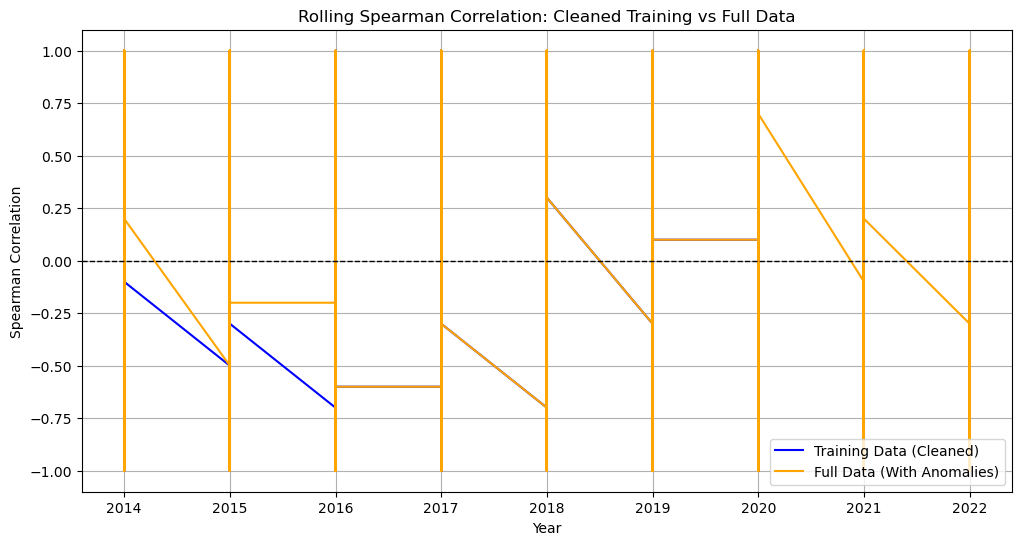

In [65]:

# Calculate rolling correlation
plt.figure(figsize=(12, 6))

# Rolling correlation for cleaned training data
plt.plot(cleaned_train_data['Year'], cleaned_train_data['rolling_corr'], label='Training Data (Cleaned)', color='blue')

# Rolling correlation for full data with anomalies
plt.plot(full_data['Year'], full_data['rolling_corr'], label='Full Data (With Anomalies)', color='orange')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Rolling Spearman Correlation: Cleaned Training vs Full Data')
plt.xlabel('Year')
plt.ylabel('Spearman Correlation')
plt.legend()
plt.grid(True)
plt.show()


### **Analysis of Rolling Spearman Correlation**

This plot compares **5-year rolling Spearman correlations** between service volumes (`Tot_Suplr_Srvcs`) and submitted charges (`Avg_Suplr_Sbmtd_Chrg`) for:
1. **Cleaned Training Data** (blue): A stable baseline with anomalies removed.
2. **Full Data (With Anomalies)** (orange): Real-world data including test periods and anomalies.


### **Key Observations**
- **Full Data Variability**: The orange line shows significant fluctuations, especially post-2020, likely due to anomalies and external disruptions.
- **Stable Baseline**: The blue line is smoother, reflecting systemic trends without outliers.
- **Post-2020 Instability**: Correlations become highly negative and erratic, suggesting inefficiencies or irregularities.



## Trend Analysis

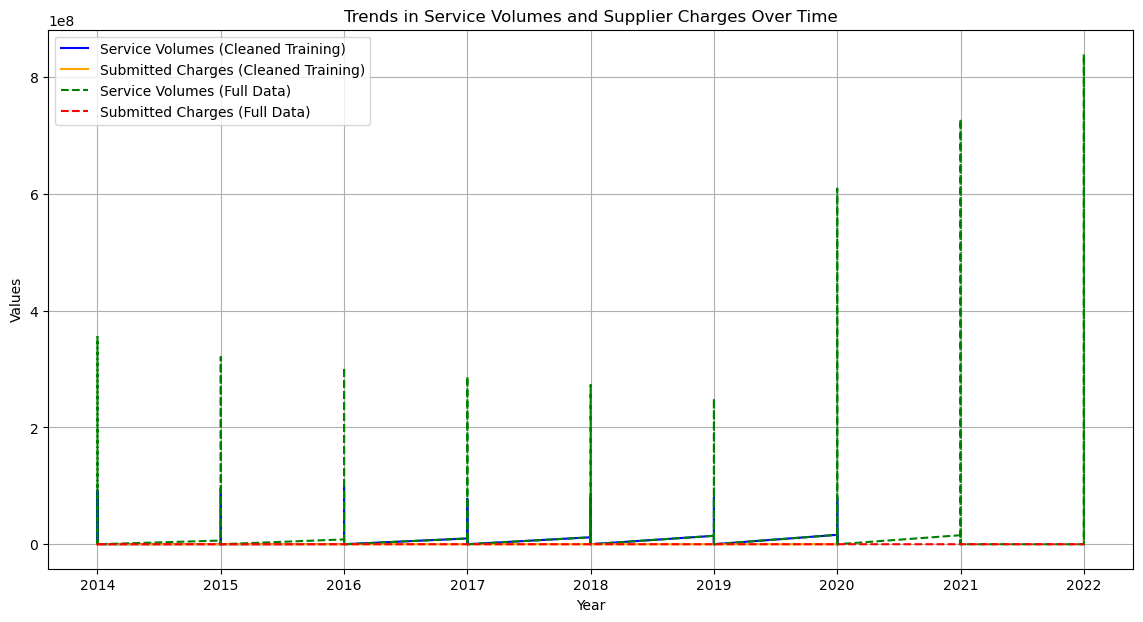

In [67]:
# Plot trends for both cleaned training data and full data
plt.figure(figsize=(14, 7))

# Plot for cleaned training data
plt.plot(cleaned_train_data['Year'], cleaned_train_data['Tot_Suplr_Srvcs'], label='Service Volumes (Cleaned Training)', color='blue')
plt.plot(cleaned_train_data['Year'], cleaned_train_data['Avg_Suplr_Sbmtd_Chrg'], label='Submitted Charges (Cleaned Training)', color='orange')

# Plot for full data (training + test, with anomalies)
plt.plot(full_data['Year'], full_data['Tot_Suplr_Srvcs'], label='Service Volumes (Full Data)', linestyle='--', color='green')
plt.plot(full_data['Year'], full_data['Avg_Suplr_Sbmtd_Chrg'], label='Submitted Charges (Full Data)', linestyle='--', color='red')

# Add labels, title, and legend
plt.title('Trends in Service Volumes and Supplier Charges Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


### **Trends in Service Volumes and Submitted Charges Over Time**

This plot compares the trends in **service volumes (`Tot_Suplr_Srvcs`)** and **submitted charges (`Avg_Suplr_Sbmtd_Chrg`)** over time for:
1. **Cleaned Training Data**:
   - Solid lines (`blue` and `orange`) show trends in baseline data with anomalies removed.
2. **Full Data (With Anomalies)**:
   - Dashed lines (`green` and `red`) include both training and test data, reflecting real-world trends.


### **Key Observations**
1. **Exponential Trends in Service Volumes**:
   - Both datasets show a sharp rise in service volumes over time, with significantly higher peaks in the **full dataset**, suggesting the influence of anomalies or supplier inefficiencies.

2. **Stable Charges in Cleaned Data**:
   - Submitted charges remain relatively stable in the cleaned training data (`orange line`), indicating consistent behavior when anomalies are removed.

3. **Impact of Anomalies on Charges**:
   - The **red dashed line** (submitted charges in full data) shows noticeable deviations, especially post-2020, which could reflect anomalies or systemic disruptions.




## Charge Behavior Analysis

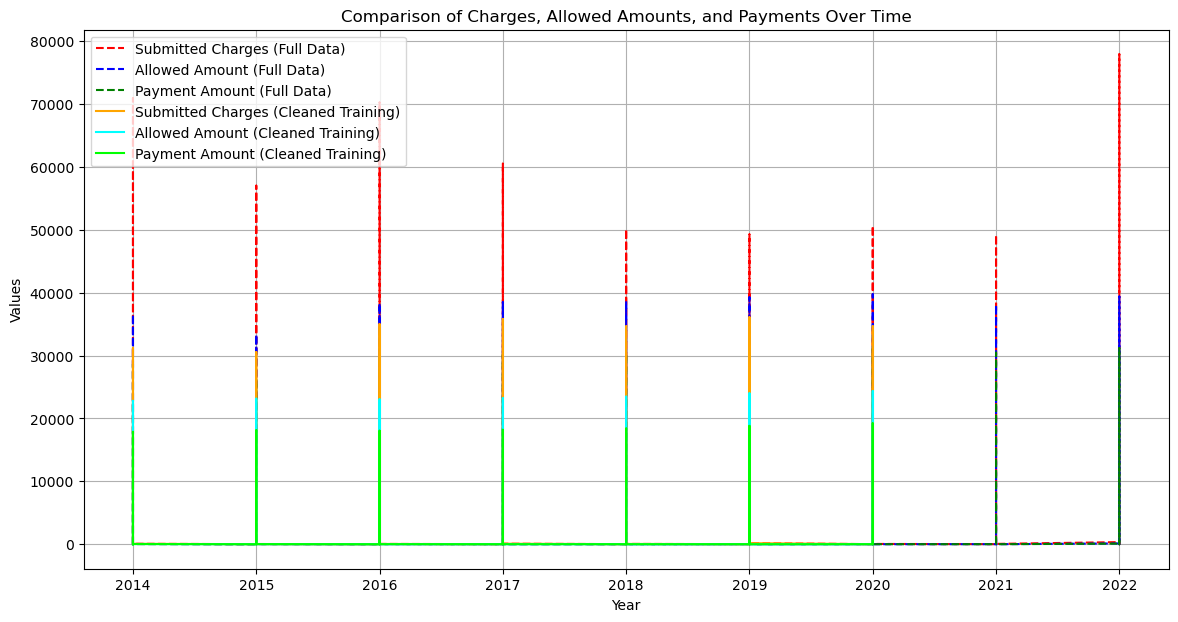

In [68]:
# Plot trends for charges, allowed amounts, and payments for cleaned and full data
plt.figure(figsize=(14, 7))

# Plot for full data (training + test, with anomalies)
plt.plot(full_data['Year'], full_data['Avg_Suplr_Sbmtd_Chrg'], label='Submitted Charges (Full Data)', linestyle='--', color='red')
plt.plot(full_data['Year'], full_data['Avg_Suplr_Mdcr_Alowd_Amt'], label='Allowed Amount (Full Data)', linestyle='--', color='blue')
plt.plot(full_data['Year'], full_data['Avg_Suplr_Mdcr_Pymt_Amt'], label='Payment Amount (Full Data)', linestyle='--', color='green')

# Plot for cleaned training data
plt.plot(cleaned_train_data['Year'], cleaned_train_data['Avg_Suplr_Sbmtd_Chrg'], label='Submitted Charges (Cleaned Training)', color='orange')
plt.plot(cleaned_train_data['Year'], cleaned_train_data['Avg_Suplr_Mdcr_Alowd_Amt'], label='Allowed Amount (Cleaned Training)', color='cyan')
plt.plot(cleaned_train_data['Year'], cleaned_train_data['Avg_Suplr_Mdcr_Pymt_Amt'], label='Payment Amount (Cleaned Training)', color='lime')

# Add labels, title, and legend
plt.title('Comparison of Charges, Allowed Amounts, and Payments Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


### **Comparison of Charges, Allowed Amounts, and Payments Over Time**

This plot compares trends in:
1. **Submitted Charges (`Avg_Suplr_Sbmtd_Chrg`)**:
   - Solid `orange` (cleaned training data).
   - Dashed `red` (full data with anomalies).
2. **Medicare Allowed Amounts (`Avg_Suplr_Mdcr_Alowd_Amt`)**:
   - Solid `cyan` (cleaned training data).
   - Dashed `blue` (full data with anomalies).
3. **Medicare Payments (`Avg_Suplr_Mdcr_Pymt_Amt`)**:
   - Solid `lime` (cleaned training data).
   - Dashed `green` (full data with anomalies).



### **Key Observations**
1. **Submitted Charges vs. Allowed and Payment Amounts**:
   - Submitted charges (`red dashed`) are consistently higher than allowed (`blue dashed`) and payment amounts (`green dashed`), reflecting typical billing practices.
   - The discrepancy widens in the **full data**, likely influenced by anomalies or irregular supplier behavior.

2. **Stable Trends in Cleaned Data**:
   - The cleaned training data (`orange`, `cyan`, `lime`) shows smoother and more consistent trends, providing a reliable baseline for comparison.

3. **Post-2020 Deviations**:
   - Significant deviations in **2021–2022** are observed in the full dataset (dashed lines), suggesting inefficiencies or disruptions during this period.




## Regional Analysis for Temporal Inefficiencies

### Identification of Regions with Unusual Spearman Correlations 

Region-Year Pairs with Unusual Correlations (High or Low):
    Rfrg_Prvdr_Geo_Desc  Year  Spearman_Correlation       P_Value
7               Alabama  2021             -0.506034  6.934349e-52
8               Alabama  2022             -0.520033  3.414224e-53
9                Alaska  2014             -0.666451  9.836712e-49
10               Alaska  2015             -0.658435  3.208559e-47
11               Alaska  2016             -0.638346  1.767559e-46
..                  ...   ...                   ...           ...
545             Wyoming  2018             -0.586576  2.097033e-43
546             Wyoming  2019             -0.575459  3.003938e-40
547             Wyoming  2020             -0.616274  1.053747e-45
548             Wyoming  2021             -0.612041  4.878378e-45
549             Wyoming  2022             -0.582561  1.563192e-39

[337 rows x 4 columns]


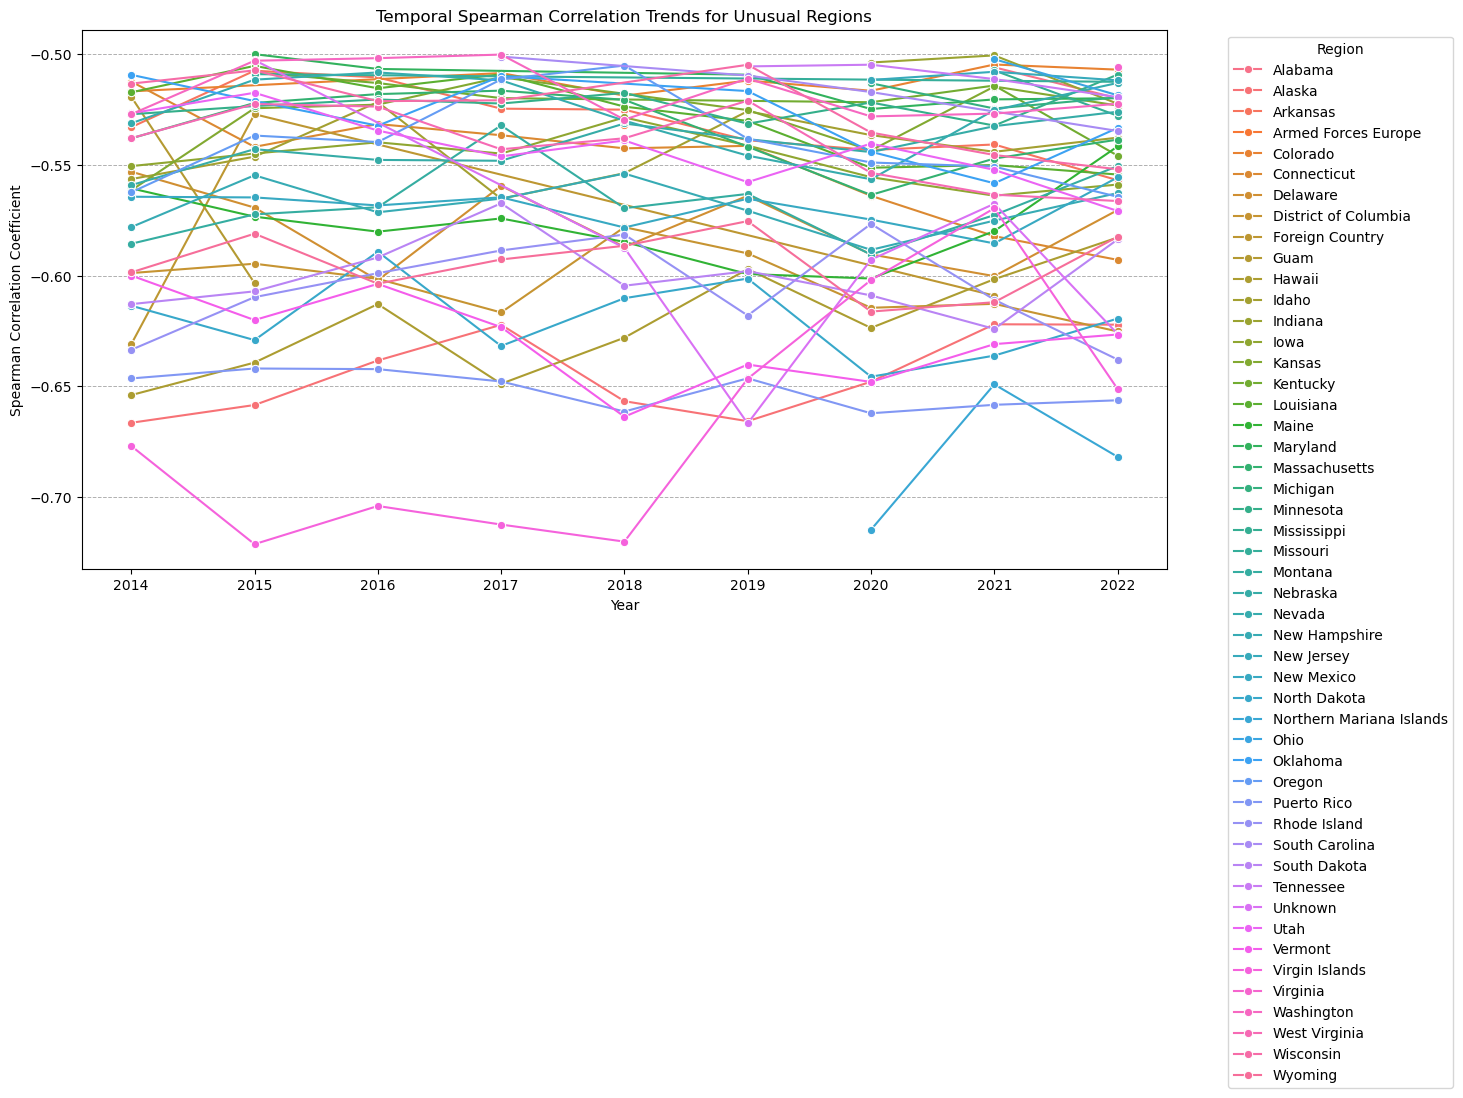

In [10]:


# Group data by region and year, compute Spearman correlation for each region-year pair
region_year_correlations = full_data.groupby(['Rfrg_Prvdr_Geo_Desc', 'Year']).apply(
    lambda df: pd.Series({
        'Spearman_Correlation': spearmanr(df['Tot_Suplr_Srvcs'], df['Avg_Suplr_Sbmtd_Chrg']).correlation,
        'P_Value': spearmanr(df['Tot_Suplr_Srvcs'], df['Avg_Suplr_Sbmtd_Chrg']).pvalue
    })
).reset_index()

# Define thresholds for unusual correlations
high_threshold = 0.5  # Strong positive correlation
low_threshold = -0.5  # Strong negative correlation

# Filter region-year pairs with unusual correlations
unusual_region_years = region_year_correlations[
    (region_year_correlations['Spearman_Correlation'] > high_threshold) |
    (region_year_correlations['Spearman_Correlation'] < low_threshold)
]

# Display region-year pairs with unusual correlations
print("Region-Year Pairs with Unusual Correlations (High or Low):")
print(unusual_region_years)

# Plot Spearman Correlation for unusual region-year pairs
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=unusual_region_years,
    x='Year',
    y='Spearman_Correlation',
    hue='Rfrg_Prvdr_Geo_Desc',
    marker='o'
)
plt.title('Temporal Spearman Correlation Trends for Unusual Regions')
plt.xlabel('Year')
plt.ylabel('Spearman Correlation Coefficient')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### **Temporal Spearman Correlation Trends for Unusual Regions**

#### **Summary**
This plot shows year-by-year Spearman correlation trends between **service volumes** and **submitted charges** for regions with unusual correlations.

- **Predominantly Negative Correlations**: Most regions exhibit stable, negative correlations ranging from -0.3 to -0.7.
- **Temporal Stability**: Many regions maintain consistent trends, indicating persistent systemic inefficiencies.
- **Fluctuating Regions**: Certain regions show significant correlation changes over time, reflecting localized disruptions or anomalies.
- **Post-2020 Variations**: Some regions display sharper fluctuations during 2020–2022, potentially due to external factors like COVID-19.

#### **Implications**
- Negative correlations highlight inefficiencies where charges are not proportional to service volumes.
- Regional disparities and post-2020 shifts require further investigation to address localized inefficiencies and systemic irregularities.


### Temporal Correlation Differences Between Full and Cleaned Data (By Region)

Comparison of Regional Correlations (Full vs. Cleaned Data):
    Rfrg_Prvdr_Geo_Desc  Year  Spearman_Correlation_Full  P_Value_Full  \
0               Alabama  2014                  -0.461009  1.411716e-46   
1               Alabama  2015                  -0.470336  4.299763e-49   
2               Alabama  2016                  -0.476139  9.069264e-51   
3               Alabama  2017                  -0.479010  2.296142e-50   
4               Alabama  2018                  -0.480740  5.367086e-51   
..                  ...   ...                        ...           ...   
423             Wyoming  2016                  -0.603705  2.336177e-43   
424             Wyoming  2017                  -0.592771  1.122159e-41   
425             Wyoming  2018                  -0.586576  2.097033e-43   
426             Wyoming  2019                  -0.575459  3.003938e-40   
427             Wyoming  2020                  -0.616274  1.053747e-45   

     Spearman_Correlation_Cleaned  P_Value_Cleaned

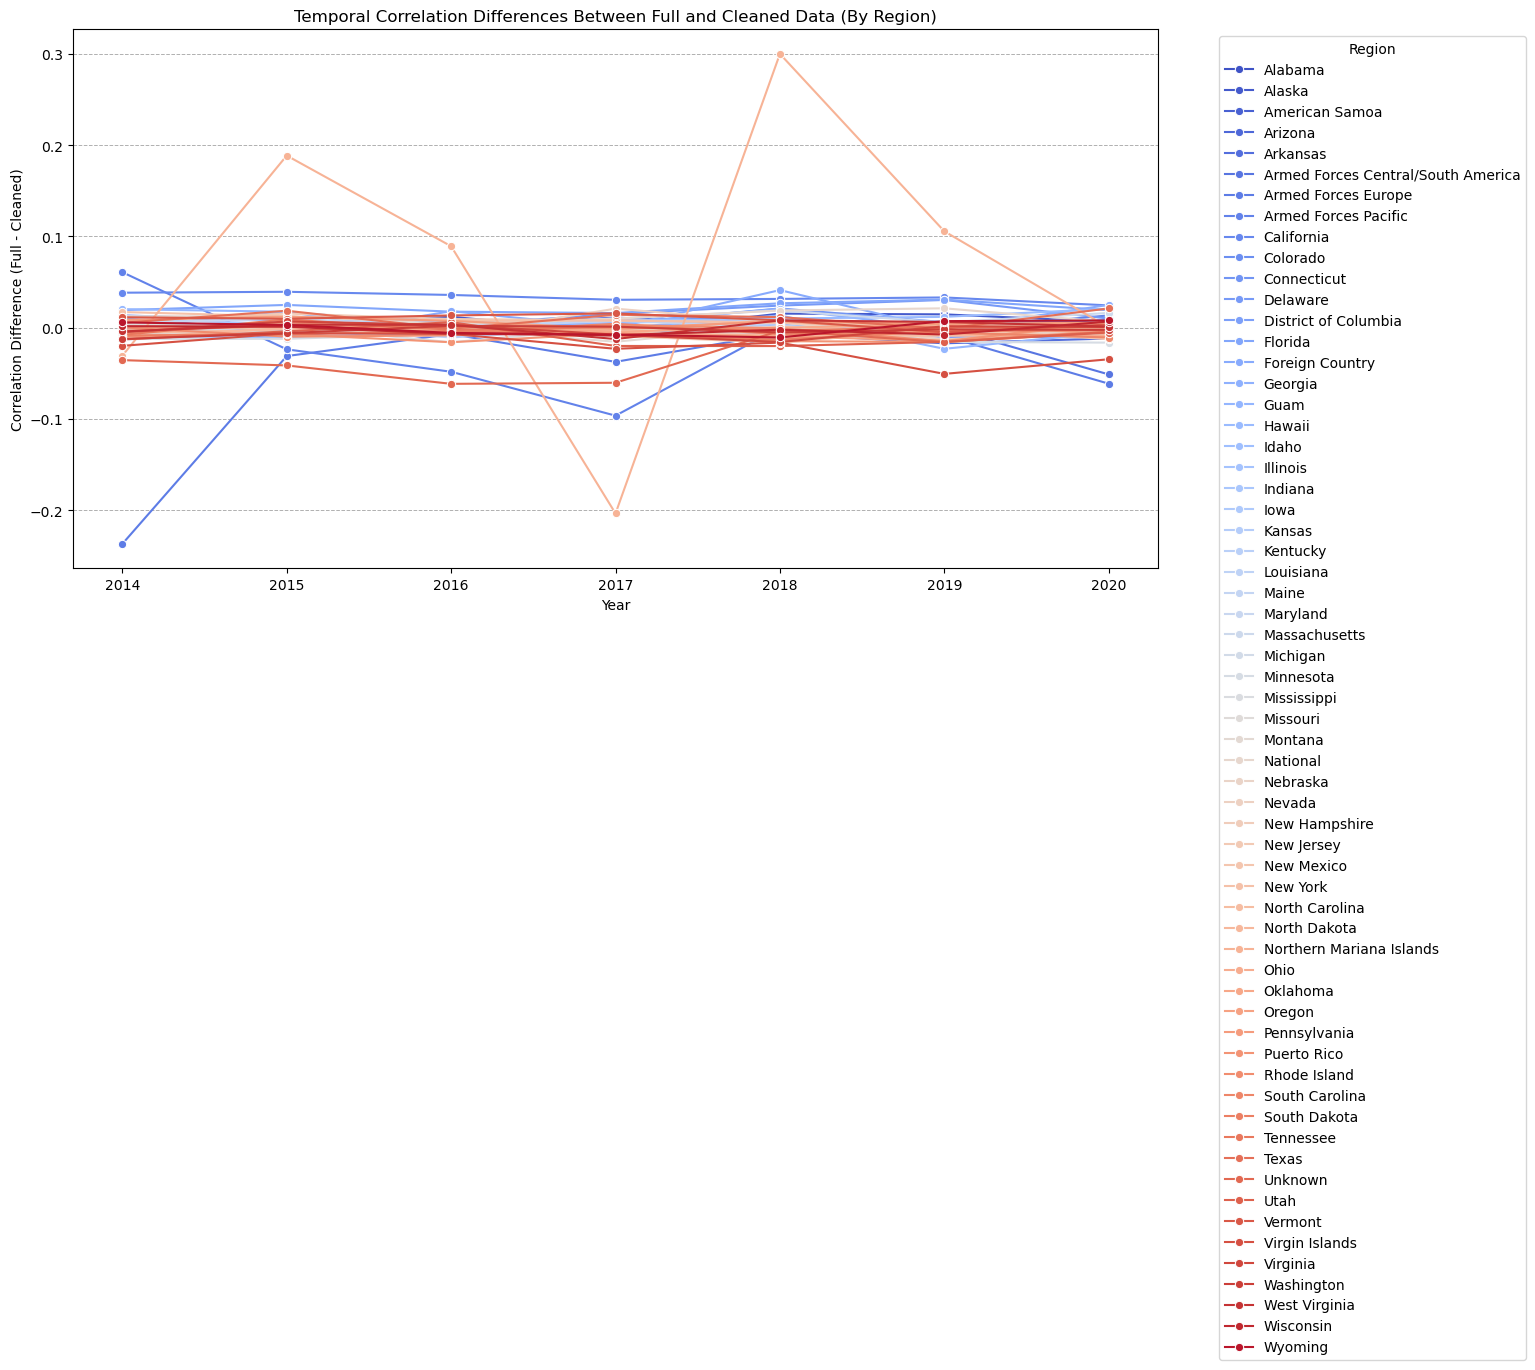

In [11]:

# Group cleaned training data by region and year to compute Spearman correlation
cleaned_region_year_correlations = cleaned_train_data.groupby(['Rfrg_Prvdr_Geo_Desc', 'Year']).apply(
    lambda df: pd.Series({
        'Spearman_Correlation_Cleaned': spearmanr(df['Tot_Suplr_Srvcs'], df['Avg_Suplr_Sbmtd_Chrg']).correlation,
        'P_Value_Cleaned': spearmanr(df['Tot_Suplr_Srvcs'], df['Avg_Suplr_Sbmtd_Chrg']).pvalue
    })
).reset_index()

# Group full data by region and year to compute Spearman correlation
region_year_correlations = full_data.groupby(['Rfrg_Prvdr_Geo_Desc', 'Year']).apply(
    lambda df: pd.Series({
        'Spearman_Correlation_Full': spearmanr(df['Tot_Suplr_Srvcs'], df['Avg_Suplr_Sbmtd_Chrg']).correlation,
        'P_Value_Full': spearmanr(df['Tot_Suplr_Srvcs'], df['Avg_Suplr_Sbmtd_Chrg']).pvalue
    })
).reset_index()

# Merge full and cleaned correlations for comparison
comparison = pd.merge(
    region_year_correlations,
    cleaned_region_year_correlations,
    on=['Rfrg_Prvdr_Geo_Desc', 'Year'],
    how='inner'
)

# Compute correlation differences
comparison['Correlation_Difference'] = (
    comparison['Spearman_Correlation_Full'] - comparison['Spearman_Correlation_Cleaned']
)

# Display the comparison DataFrame
print("Comparison of Regional Correlations (Full vs. Cleaned Data):")
print(comparison)

# Optional: Visualize correlation differences
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=comparison,
    x='Year',
    y='Correlation_Difference',
    hue='Rfrg_Prvdr_Geo_Desc',
    marker='o',
    palette='coolwarm'
)
plt.title('Temporal Correlation Differences Between Full and Cleaned Data (By Region)')
plt.xlabel('Year')
plt.ylabel('Correlation Difference (Full - Cleaned)')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### **Temporal Correlation Differences Between Full and Cleaned Data (By Region)**

#### **Summary**
This plot shows the differences in Spearman correlations between **full data (with anomalies)** and **cleaned training data (anomalies removed)** across regions, year by year.

- **Small Differences for Most Regions**: Correlation differences remain close to zero for the majority of regions, indicating that anomalies have minimal impact on their temporal trends.
- **Regions with Larger Deviations**: A few regions exhibit significant positive or negative differences, suggesting that anomalies heavily influence their correlations.
- **Temporal Stability**: Most regions maintain consistent differences over time, while a few show abrupt deviations in specific years.

#### **Implications**
- **Localized Anomaly Impact**: Regions with larger deviations may require targeted anomaly investigations or policy interventions.
- **Baseline Validation**: Minimal differences for most regions validate the robustness of the cleaned dataset as a baseline for systemic analysis.
- **Year-Specific Changes**: Significant deviations in specific years indicate possible external disruptions (e.g., policy changes, market shifts) that merit further investigation.
